In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

In [8]:
df = pd.read_csv('../data/galaxies_cartesian.csv')
galaxy_positions = df[['x', 'y', 'z_cart']].values

In [9]:
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()
z_min, z_max = df['z_cart'].min(), df['z_cart'].max()

In [15]:
num_random = 5 * len(df)
random_positions = np.column_stack((
    np.random.uniform(x_min, x_max, num_random),
    np.random.uniform(y_min, y_max, num_random),
    np.random.uniform(z_min, z_max, num_random)
))

In [16]:
def count_pairs(data1, data2, bins):
    tree1 = cKDTree(data1)
    counts = np.zeros(len(bins) - 1)

    for i in range(len(bins) - 1):
        counts[i] = tree1.count_neighbors(cKDTree(data2), bins[i+1]) - tree1.count_neighbors(cKDTree(data2), bins[i])

    return counts

In [17]:
bins = np.linspace(0, 150, 30)
DD = count_pairs(galaxy_positions, galaxy_positions, bins)
RR = count_pairs(random_positions, random_positions, bins)
DR = count_pairs(galaxy_positions, random_positions, bins)

#normalizing
DD = DD / (len(galaxy_positions) * (len(galaxy_positions) - 1) / 2)
RR = RR / (len(random_positions) * (len(random_positions) - 1) / 2)
DR = DR / (len(galaxy_positions) * len(random_positions))

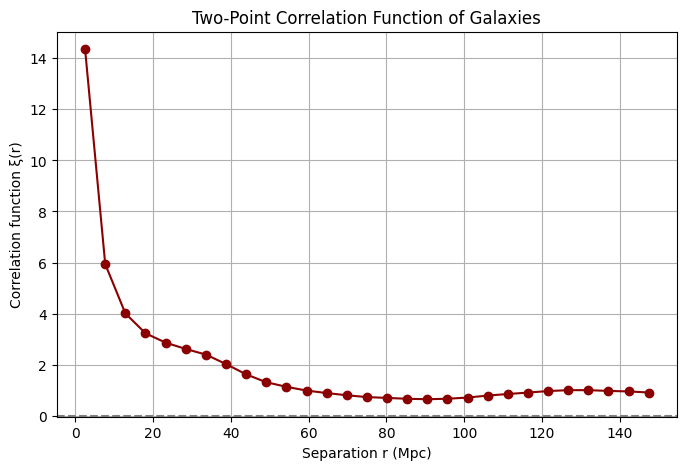

In [19]:
xi = (DD - 2 * DR + RR) / RR
r = 0.5 * (bins[:-1] + bins[1:])

plt.figure(figsize=(8, 5))
plt.plot(r, xi, marker='o', linestyle='-', color='darkred')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Separation r (Mpc)')
plt.ylabel('Correlation function ξ(r)')
plt.title('Two-Point Correlation Function of Galaxies')
plt.grid(True)
plt.show()